# Práctica 1: Reglas de asociación

Imports necesarios para la realización de la práctica

In [239]:
import pandas as pd
import apyori as apy
from tabulate import tabulate
import mlxtend as mlx
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.simplefilter("ignore", category=FutureWarning)

In [240]:
itemset = pd.read_csv("BlackFriday.csv").dropna().drop_duplicates()
itemset

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
5,1000013,P00350442,M,46-50,1,C,3,1,2,3.0,15.0
6,1000013,P00155442,M,46-50,1,C,3,1,1,11.0,15.0
7,1000013,P0094542,M,46-50,1,C,3,1,2,4.0,9.0
8,1000015,P00161842,M,26-35,7,A,1,0,10,13.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...
233584,1006023,P00262242,M,26-35,0,C,2,1,1,11.0,16.0
233586,1006026,P00110742,M,36-45,6,C,1,1,1,2.0,8.0
233588,1006030,P00129842,M,26-35,17,C,1,1,6,8.0,15.0
233591,1006033,P00127642,M,51-55,13,B,1,1,1,2.0,15.0


#### Pregunta Nº1: Prueba al menos tres configuraciones de soporte y frecuencia para cada género, edad y tipo de producto. (1 punto)


In [241]:
# Hiperparámetros
min_support = [0.1, 0.2, 0.3]
min_confidence = [0.4, 0.6, 0.7]

Configuraciones de soporte y frecuencia

- Para Edad:

In [242]:
tabla = itemset.loc[:,['Gender', 'Age', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']].astype(str)
transactions = []
for _, row in tabla.iterrows():
    transactions.append([str(row[col]) for col in tabla])
transactions.sort()
transactions

[['F', '0-17', '1', '11.0', '15.0'],
 ['F', '0-17', '1', '11.0', '15.0'],
 ['F', '0-17', '1', '11.0', '15.0'],
 ['F', '0-17', '1', '11.0', '15.0'],
 ['F', '0-17', '1', '11.0', '15.0'],
 ['F', '0-17', '1', '11.0', '15.0'],
 ['F', '0-17', '1', '11.0', '15.0'],
 ['F', '0-17', '1', '11.0', '16.0'],
 ['F', '0-17', '1', '11.0', '16.0'],
 ['F', '0-17', '1', '11.0', '16.0'],
 ['F', '0-17', '1', '13.0', '16.0'],
 ['F', '0-17', '1', '14.0', '16.0'],
 ['F', '0-17', '1', '14.0', '16.0'],
 ['F', '0-17', '1', '14.0', '16.0'],
 ['F', '0-17', '1', '14.0', '16.0'],
 ['F', '0-17', '1', '14.0', '16.0'],
 ['F', '0-17', '1', '14.0', '16.0'],
 ['F', '0-17', '1', '14.0', '17.0'],
 ['F', '0-17', '1', '15.0', '16.0'],
 ['F', '0-17', '1', '15.0', '16.0'],
 ['F', '0-17', '1', '15.0', '16.0'],
 ['F', '0-17', '1', '15.0', '16.0'],
 ['F', '0-17', '1', '15.0', '16.0'],
 ['F', '0-17', '1', '15.0', '16.0'],
 ['F', '0-17', '1', '15.0', '16.0'],
 ['F', '0-17', '1', '15.0', '16.0'],
 ['F', '0-17', '1', '15.0', '16.0'],
 

In [243]:
def take_support(cont, df_soport):
    for i in min_support:
        print("Para min_support = " + str(i) + ":")
        results = apy.apriori(transactions, min_support=i)
        df = pd.DataFrame(columns=['items', 'support', 'size'])
        df_freq = pd.DataFrame(columns=['items', 'frequency', 'size'])
        data = []

        for result in results:
            data.append({'items': list(result.items), 'support': result.support, 'size': len(result.items)})
        df = df.append(data, ignore_index=True)

        print(tabulate(df, headers='keys', tablefmt='fancy_grid'))

        print("Para min_freq = " + str(round(i * len(transactions), 0)) + ":")

        data_freq = []
        for result in apy.apriori(transactions):
            freq_item = round(result.support * len(transactions), 0)
            if freq_item > round(i * len(transactions), 0):
                data_freq.append({'items': list(result.items), 'frequency': freq_item, 'size': len(result.items)})
        df_freq = df_freq.append(data_freq, ignore_index=True)
        print(tabulate(df_freq, headers='keys', tablefmt='fancy_grid'))


        if i == 0.2:
            df_soport = df
            
        cont = cont + 1
    return df_soport

In [244]:
cont = 0

df_soport = pd.DataFrame()

df_soport = take_support(cont, df_soport)

Para min_support = 0.1:
╒════╤═══════════════════════╤═══════════╤════════╕
│    │ items                 │   support │   size │
╞════╪═══════════════════════╪═══════════╪════════╡
│  0 │ ['1']                 │  0.550924 │      1 │
├────┼───────────────────────┼───────────┼────────┤
│  1 │ ['14.0']              │  0.183031 │      1 │
├────┼───────────────────────┼───────────┼────────┤
│  2 │ ['15.0']              │  0.254909 │      1 │
├────┼───────────────────────┼───────────┼────────┤
│  3 │ ['16.0']              │  0.200417 │      1 │
├────┼───────────────────────┼───────────┼────────┤
│  4 │ ['17.0']              │  0.100173 │      1 │
├────┼───────────────────────┼───────────┼────────┤
│  5 │ ['18-25']             │  0.191069 │      1 │
├────┼───────────────────────┼───────────┼────────┤
│  6 │ ['2.0']               │  0.264834 │      1 │
├────┼───────────────────────┼───────────┼────────┤
│  7 │ ['26-35']             │  0.398933 │      1 │
├────┼───────────────────────┼──────────

#### Pregunta Nº2: ¿Qué diferencias hay entre usar soporte y frecuencia? Respalda la respuesta con datos
La frecuencia es el número de veces que aparece un dato, y el soporte es la proporción de ese dato respecto al total de datos. No hay ninguna diferencia relativa al uso de uno u otro método, ya que, aunque la frecuencia sea un número entero, el soporte es la proporción de veces que aparece ese elemento.

#### Pregunta Nº3: ¿Qué tipo reglas desaparecen según la configuración y categorías (género, edad y tipo de producto) consideradas? ¿Por qué? 
Si miramos los índices de soporte mayor, los elementos primarios que no cumplan ese soporte "podarán" a los siguientes, por lo que el número de reglas será menor. Si subimos la confianza, el número de reglas que cumplen esa confianza pueden ser pocas o nulas, por lo que, aunque haya las mismas reglas, la confianza nos hará descartar ciertas reglas que sean menores que la confianza.

En el caso de las categorías, vamos a sacar lo mismo que en el ejemplo anterior, una vez sin la columna género, otra sin edad, y otra sin tipo de producto:

In [245]:
# Sin género
tabla = itemset.loc[:,['Age', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']].astype(str)
transactions = []
for _, row in tabla.iterrows():
    transactions.append([str(row[col]) for col in tabla])
transactions.sort()

cont = 0

print("==============================================")
print("                SIN GENERO ")
print("==============================================")

take_support(cont, df_soport)


# Sin EDAD
tabla = itemset.loc[:,['Gender', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']].astype(str)
transactions = []
for _, row in tabla.iterrows():
    transactions.append([str(row[col]) for col in tabla])
transactions.sort()

cont = 0

print("==============================================")
print("                SIN EDAD ")
print("==============================================")

take_support(cont, df_soport)



# Sin Tipo de producto
tabla = itemset.loc[:,['Gender', 'Age']].astype(str)
transactions = []
for _, row in tabla.iterrows():
    transactions.append([str(row[col]) for col in tabla])
transactions.sort()

cont = 0

print("==============================================")
print("                SIN TIPO DE PRODUCTOS ")
print("==============================================")

take_support(cont, df_soport)

                SIN GENERO 
Para min_support = 0.1:
╒════╤═══════════════════════╤═══════════╤════════╕
│    │ items                 │   support │   size │
╞════╪═══════════════════════╪═══════════╪════════╡
│  0 │ ['1']                 │  0.550924 │      1 │
├────┼───────────────────────┼───────────┼────────┤
│  1 │ ['14.0']              │  0.183031 │      1 │
├────┼───────────────────────┼───────────┼────────┤
│  2 │ ['15.0']              │  0.254909 │      1 │
├────┼───────────────────────┼───────────┼────────┤
│  3 │ ['16.0']              │  0.200417 │      1 │
├────┼───────────────────────┼───────────┼────────┤
│  4 │ ['17.0']              │  0.100173 │      1 │
├────┼───────────────────────┼───────────┼────────┤
│  5 │ ['18-25']             │  0.191069 │      1 │
├────┼───────────────────────┼───────────┼────────┤
│  6 │ ['2.0']               │  0.264834 │      1 │
├────┼───────────────────────┼───────────┼────────┤
│  7 │ ['26-35']             │  0.398933 │      1 │
├────┼──────

,items,support,size
0,[26-35],0.398933,1
1,[F],0.225615,1
2,[M],0.774385,1
3,"[26-35, M]",0.317736,2


Vamos a analizar los datos:
- Sin edad: Sin la columna edad, en la primera iteración nos saca 25 reglas frente a 41, por lo que la columna 'edad' influye aproximadamente en un 40% de las reglas.
- Sin género: Sin la columna género, en la primera iteración nos saca 28 reglas, por lo que la columna género influye en aproximadamente un 32% de las reglas.
- Sin el tipo de producto: Sin las 3 columnas del tipo de producto, la primera iteración saca 8 columnas, por lo que las 3 columnas de tipo de producto influyen aproximadamente en un 78% de las reglas.

#### Pregunta Nº4: Para una de las configuraciones, interpreta algunas de las reglas que te hayan resultado interesantes obtenidas usando la clase association_rules y un par de configuraciones cambiando la variable metric y min_threshold. Justifica los resultados. 


In [246]:
df_assoc = pd.concat([df_soport.iloc[:, 1], df_soport.iloc[:, 0]], axis=1)
df_assoc.columns = "support", "itemsets"
df_assoc

df_reglas_configuraciones = pd.DataFrame(columns=["Antecedentes", "Consecuentes", "Soporte de antecedente", "Soporte de consecuente", "Soporte", 'Confianza'])
headers = ["Antecedentes", "Consecuentes", "Soporte de antecedente", "Soporte de consecuente", "Soporte", 'Confianza']
min_threshold_soporte = [0.2, 0.3, 0.4]
min_threshold_confianza = [0.4, 0.5, 0.8]

for i in min_threshold_soporte:
    print("\n\n\t\t\t\t\t------------ SOPORTE = " + str(i) + " ------------\n")
    asoc_rules = association_rules(df_assoc, metric='support', min_threshold=i).iloc[:, :-3]
    asoc_rules['antecedents'] = asoc_rules['antecedents'].apply(lambda x: list(x)[0])
    asoc_rules['consequents'] = asoc_rules['consequents'].apply(lambda x: list(x)[0])
    print(tabulate(asoc_rules, headers=headers, tablefmt="fancy_grid"))
for i in min_threshold_confianza:
    print("\n\n\t\t\t\t\t------------ CONFIANZA = " + str(i) + " ------------\n")
    asoc_rules = association_rules(df_assoc, metric='confidence', min_threshold=i).iloc[:, :-3]
    asoc_rules['antecedents'] = asoc_rules['antecedents'].apply(lambda x: list(x)[0])
    asoc_rules['consequents'] = asoc_rules['consequents'].apply(lambda x: list(x)[0])
    print(tabulate(asoc_rules, headers=headers, tablefmt="fancy_grid"))




					------------ SOPORTE = 0.2 ------------

╒════╤════════════════╤════════════════╤══════════════════════════╤══════════════════════════╤═══════════╤═════════════╕
│    │ Antecedentes   │ Consecuentes   │   Soporte de antecedente │   Soporte de consecuente │   Soporte │   Confianza │
╞════╪════════════════╪════════════════╪══════════════════════════╪══════════════════════════╪═══════════╪═════════════╡
│  0 │ 2.0            │ 1              │                 0.264834 │                 0.550924 │  0.264834 │    1        │
├────┼────────────────┼────────────────┼──────────────────────────┼──────────────────────────┼───────────┼─────────────┤
│  1 │ 1              │ 2.0            │                 0.550924 │                 0.264834 │  0.264834 │    0.480708 │
├────┼────────────────┼────────────────┼──────────────────────────┼──────────────────────────┼───────────┼─────────────┤
│  2 │ 26-35          │ 1              │                 0.398933 │                 0.550924 │  0.226727 

Para este apartado, hemos utilizado la última configuración, cuyo valor era soporte = 0.2. Para esta configuración hemos extraído varias reglas, y hemos cambiado los valores de soporte y de confianza para sacar la siguiente interpretación:

- Para la configuración de soporte:
    - Soporte 0.2: Para esta configuración hemos extraído un total de 18 reglas de asociación.
    - Soporte 0.3: Para esta configuración, hemos extraído un total de 4 reglas de asociación.
    - Soporte 0.4: Para esta configuración, hemos extraído un total de 2 reglas de asociación.
- Para la configuración de confianza:
    - Confianza 0.4: Para esta configuración, hemos extraído un total de 14 reglas de asociación.
    - Confianza 0.5: Para esta configuración, hemos extraído un total de 10 reglas de asociación.
    - Confianza 0.8: Para esta configuración, hemos extraído un total de 7 reglas de asociación.

### Interpretación para soporte = 0.3 y confianza = 0.8
- Soporte:
Si nos fijamos en los resultados, el soporte indica la proporción en que esa regla aparece en el dataset. Un soporte de 0.4 es un soporte medianamente alto, por lo que las 2 reglas que aparecen, son bastante comunes. Estas son 1 -> M y M -> 1, indicando que en muchas ocasiones, un hombre escoge un producto de categoría 1: 1.

- Confianza: En el caso de los resultados obtenidos con confianza 0.8, podemos decir que esas reglas se cumplen en un alto porcentaje de las veces que aparecen. Por ejemplo, la primera regla que vemos es la de si Product_Category_2 = 2.0 o Product_Category_3 = 2.0, entonces Product_Category_1 = 1. Esta confianza es de 1, es decir, que esta regla se cumple siempre que hay un 2.0 como antecedente

#### Pregunta Nº5: Dadas las mejores configuraciones. ¿Existen reglas o patrones que se repitan? ¿Podemos generalizar de alguna manera como se comportan los clientes? Expón las conclusiones respaldadas con datos

Para la mejor configuración, hemos buscado las reglas con soporte 0,2 y confianza 0,7. Esto es porque hemos pensado que, con un soporte mayor, tendríamos muy pocas reglas, y con una confianza menor, tendríamos reglas poco efectivas. Buscamos reglas que al menos se cumplan en más de la mitad de situaciones en las que aparecen.

Vamos a extraer estas reglas mediante el siguiente código.

In [247]:
rules = association_rules(df_assoc, metric='support', min_threshold=0.2).iloc[:, :-3]
rules = rules[rules['confidence'] >= 0.7]
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence
0,(2.0),(1),0.264834,0.550924,0.264834,1.000000
4,(1),(M),0.550924,0.774385,0.448907,0.814825
6,(15.0),(M),0.254909,0.774385,0.212988,0.835542
8,(2.0),(M),0.264834,0.774385,0.214536,0.810078
10,(26-35),(M),0.398933,0.774385,0.317736,0.796464
12,"(2.0, 1)",(M),0.264834,0.774385,0.214536,0.810078
13,"(2.0, M)",(1),0.214536,0.550924,0.214536,1.000000
15,(2.0),"(1, M)",0.264834,0.448907,0.214536,0.810078


Una vez tenemos estas reglas, podemos ver cómo hay algunas reglas que podemos generalizar. Por ejemplo, la regla con índice 8, es la misma que la regla 15, con la misma confianza y el mismo soporte, solo que la 15 además incluye un consecuente, el 1. Lo mismo sucede con la 8 y la 12, por lo que podríamos eliminar la regla 8.


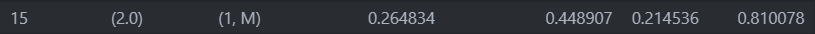


Otra regla que podríamos eliminar, es la regla número 0 y la numero 13. Ambas tienen la misma confianza, y la diferencia de soporte es pequeña, por lo que podríamos eliminar la 0 y generalizar en la 15.


